In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

df = pd.read_csv("abalone.csv", index_col=0)
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
id,,,,,,,,,
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


In [3]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight', 'Rings'],
      dtype='object')

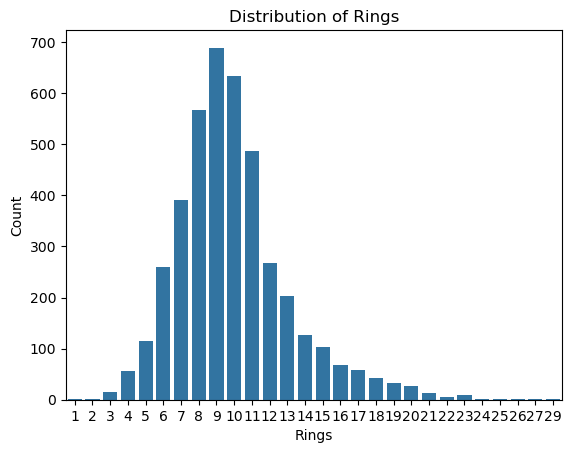

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='Rings')
plt.xlabel('Rings')
plt.ylabel('Count')
plt.title('Distribution of Rings')
plt.show()

In [5]:
df['Rings'].value_counts()

Rings
9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: count, dtype: int64

In [6]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

In [7]:
df = df.dropna()
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

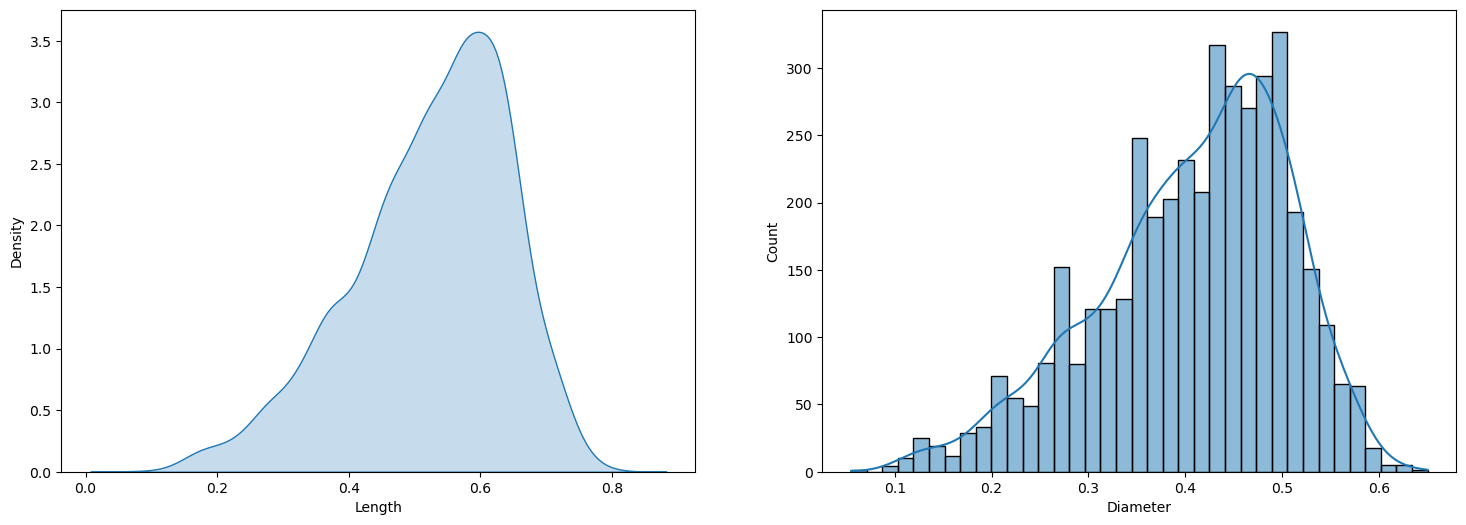

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

figure = plt.figure(figsize=(18, 6))

ax1 = plt.subplot(1, 2, 1)
sns.kdeplot(df['Length'], ax=ax1, fill=True)

ax2 = plt.subplot(1, 2, 2)
sns.histplot(df['Diameter'], ax=ax2, kde=True)

plt.show()

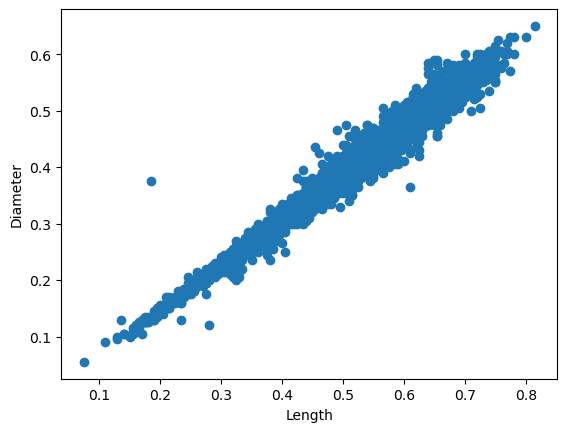

In [9]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(df['Length'], df['Diameter'])
plt.xlabel('Length')
plt.ylabel('Diameter')

plt.show()

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

df['Sex'] = df['Sex'].astype('category')

In [11]:
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Sex']

id
0       2
1       2
2       0
3       2
4       1
       ..
4172    0
4173    2
4174    2
4175    0
4176    2
Name: Sex, Length: 4177, dtype: int64

In [12]:
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
id,,,,,,,,,
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


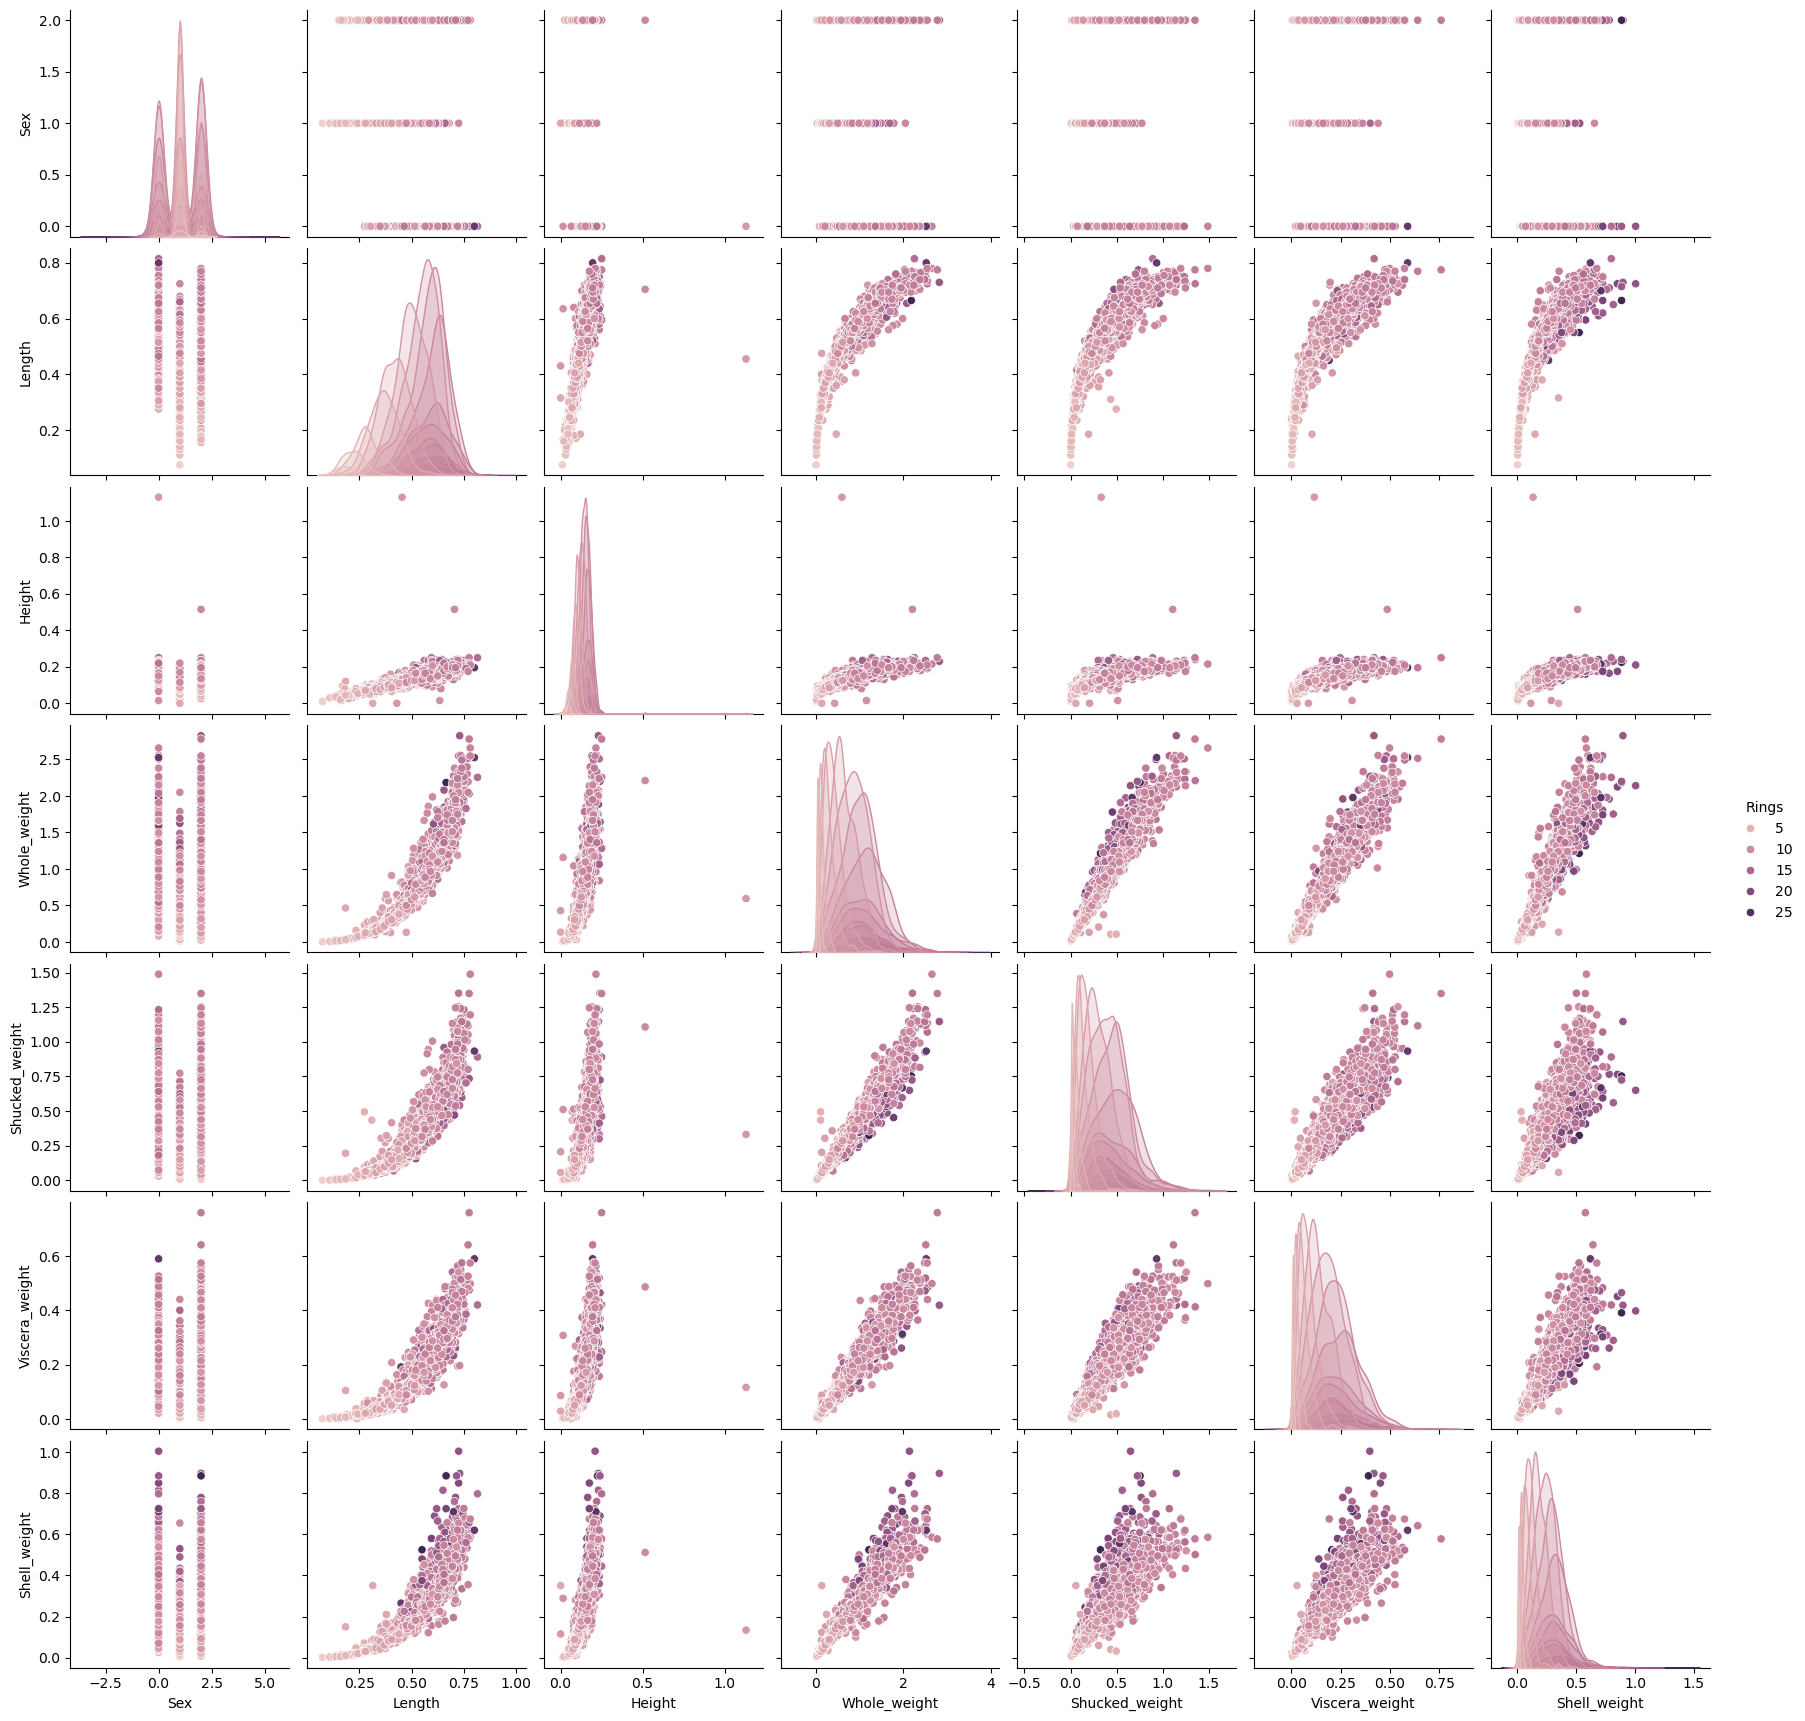

In [13]:
sns.pairplot(df,
             vars=['Sex', 'Length', 'Height', 'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight'],
             hue='Rings')
plt.show()sns.set_theme(style="whitegrid")
sns.boxplot(x="Length", data=df, palette="Set3")
plt.title("Length")
plt.show()

/var/folders/yj/_g4w66fx1ps2gpwqh06f_7jm0000gn/T/ipykernel_44156/140688713.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Length", data=df, palette="Set3")


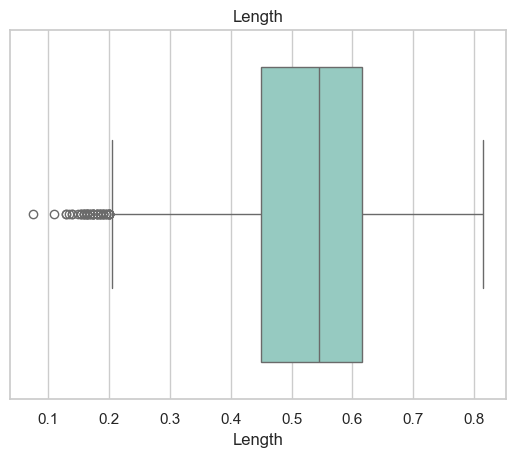

In [14]:
sns.set_theme(style="whitegrid")
sns.boxplot(x="Length", data=df, palette="Set3")
plt.title("Length")
plt.show()

/var/folders/yj/_g4w66fx1ps2gpwqh06f_7jm0000gn/T/ipykernel_44156/111277950.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax = ax)


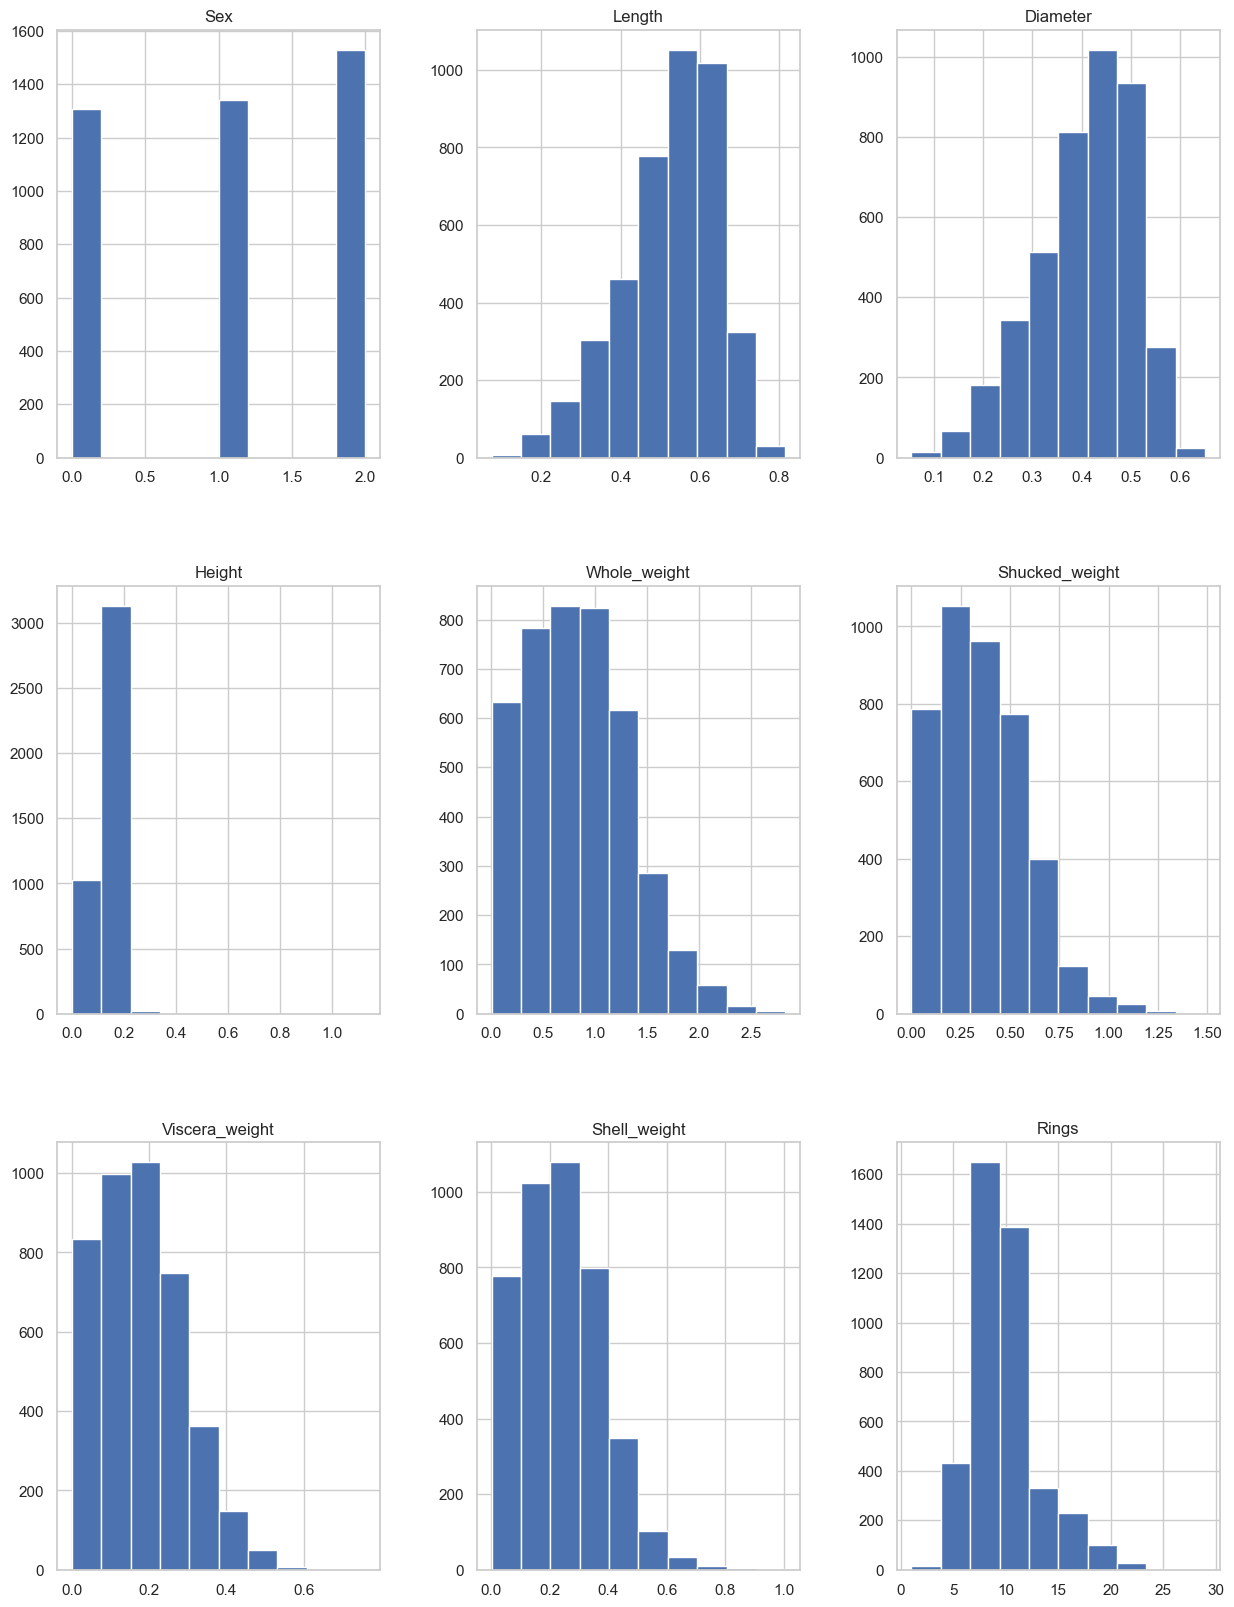

In [15]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)
plt.show()

In [18]:
X = df[['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight']]
y = df['Rings']

In [19]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(X)

y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))


In [20]:
import numpy as np

def create_sequences(X, y, time_steps=10):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:i+time_steps])
        ys.append(y[i+time_steps])
    return np.array(Xs), np.array(ys)

time_steps = 10
X_sequence, y_sequence = create_sequences(X_scaled, y_scaled, time_steps)


In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_sequence, y_sequence, test_size=0.2, shuffle=False)


In [24]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras import Input

In [26]:

model = Sequential()
model.add(Input(shape=(X_train.shape[1], X_train.shape[2]))) 
model.add(LSTM(units=64, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=64))
model.add(Dropout(0.2))
model.add(Dense(1))


In [27]:

model.compile(optimizer='adam', loss='mean_squared_error')

In [28]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0233 - val_loss: 0.0088
Epoch 2/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0125 - val_loss: 0.0080
Epoch 3/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0130 - val_loss: 0.0078
Epoch 4/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0115 - val_loss: 0.0075
Epoch 5/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0123 - val_loss: 0.0104
Epoch 6/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0113 - val_loss: 0.0075
Epoch 7/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0108 - val_loss: 0.0074
Epoch 8/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0104 - val_loss: 0.0106
Epoch 9/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0107 - val_loss: 0.0083
Epoch 10/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0108 - val_loss: 0.0071
Epoch 11/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0105 - val_loss: 0.0074
Epoch 12/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

In [29]:

loss = model.evaluate(X_test, y_test)

y_pred = model.predict(X_test)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0103 
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


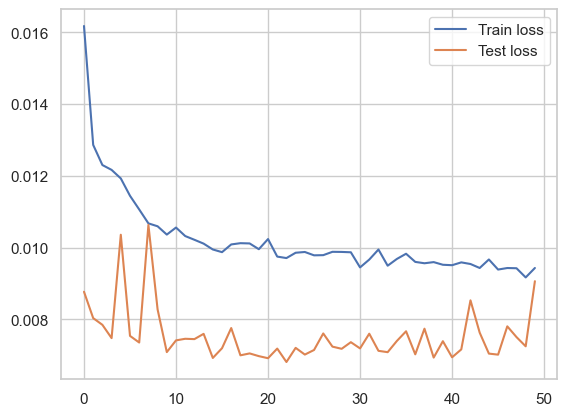

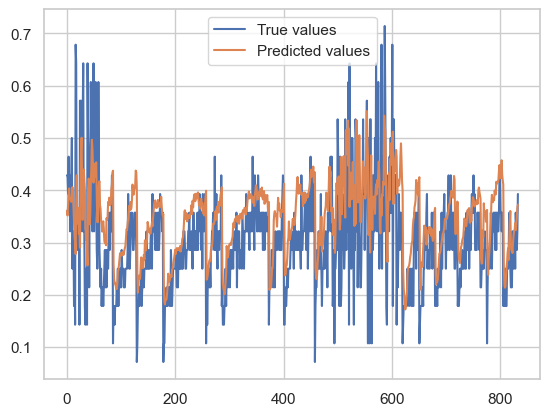

In [31]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test loss')
plt.legend()
plt.show()

plt.plot(y_test, label='True values')
plt.plot(y_pred, label='Predicted values')
plt.legend()
plt.show()
